1-D Cutting stock problem is one of the most famous problems in OR. In this problem, the amount of residual pieces of processed stock rolls must be minimized. You can minimize the number of stock rolls to be used or the total length of residual (waste, scrap, etc.) pieces. There are two other variants of this problem: 2-D and 3D. I addressed 1-D problem in this post because it is comparatively easy. Mathematical model as followed below is not a good model due to fact that it has many symmetries. There are some other technics to handle this problem. 
https://laurentlessard.com/teaching/cs524/slides/21%20-%20set%20cover%20and%20TSP.pdf

In [313]:
import gurobipy as gb
import numpy as np
import matplotlib.pyplot as plt

In [314]:
n = 10 #number of types of orders. For instance 6 20cm-length, 12 30cm-legnth, etc. 
m = 20 #number of cutting stock rolls
d = 500 #length of cutting stock roll. You may have rolls which have different lenghts. It does not matter.
dn = {i: np.random.randint(10,80) for i in range(n)} #length of every order type
tn = {i: np.random.randint(10,40) for i in range(n)} #number of every order type

In [315]:
summation = [ dn[i]*tn[i] for i in range(n)]

In [316]:
sum(summation),m*d #total length of orders (tlo) (meter) and total amount of stocks (tas) (meter). tlo must be less than tas
#for feasible model.

(9484, 10000)

In [317]:
mdl = gb.Model("Cutting Stock")

In [318]:
x = mdl.addVars(n,m, vtype = gb.GRB.INTEGER, name = "x")#number of order n cutting from stock m
y = mdl.addVars(m, vtype = gb.GRB.BINARY, name = "y")#if stock m is used, it equals to 1, ow 0

In [319]:
mdl.setObjective(gb.quicksum(y[j] for j in range(m)))#minimize number of used stocks

In [320]:
#mdl.setObjective(gb.quicksum(y[j]*d-x[i,j]*dn[i] for i in range(n) for j in range(m)))#you can minimize total length of residual
#pieces. Please try this onjective and observe difference

In [321]:
mdl.addConstrs((gb.quicksum(dn[i]*x[i,j] for i in range(n)) <= d for j in range(m)), name = "kısıt_1")
#The total length of pieces cut from a stock cannot exceed the total length of that stock.

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>,
 19: <gurobi.Constr *Awaiting Model Update*>}

In [322]:
mdl.addConstrs((gb.quicksum(x[i,j] for j in range(m)) >= tn[i] for i in range(n)), name = "kısıt_2")
#Number of cutomer orders must be satisfied.

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>}

In [323]:
mdl.addConstrs(((x[i,j] - np.floor(d/dn[i])*y[j] ) <= 0  for i in range(n) for j in range(m)), name = "kısıt_3")
#fixed charge constrains. np.floor(d/dn[i])*y[j] calculates upper bound of numbers of every order type can be cut from a stock

{(0, 0): <gurobi.Constr *Awaiting Model Update*>,
 (0, 1): <gurobi.Constr *Awaiting Model Update*>,
 (0, 2): <gurobi.Constr *Awaiting Model Update*>,
 (0, 3): <gurobi.Constr *Awaiting Model Update*>,
 (0, 4): <gurobi.Constr *Awaiting Model Update*>,
 (0, 5): <gurobi.Constr *Awaiting Model Update*>,
 (0, 6): <gurobi.Constr *Awaiting Model Update*>,
 (0, 7): <gurobi.Constr *Awaiting Model Update*>,
 (0, 8): <gurobi.Constr *Awaiting Model Update*>,
 (0, 9): <gurobi.Constr *Awaiting Model Update*>,
 (0, 10): <gurobi.Constr *Awaiting Model Update*>,
 (0, 11): <gurobi.Constr *Awaiting Model Update*>,
 (0, 12): <gurobi.Constr *Awaiting Model Update*>,
 (0, 13): <gurobi.Constr *Awaiting Model Update*>,
 (0, 14): <gurobi.Constr *Awaiting Model Update*>,
 (0, 15): <gurobi.Constr *Awaiting Model Update*>,
 (0, 16): <gurobi.Constr *Awaiting Model Update*>,
 (0, 17): <gurobi.Constr *Awaiting Model Update*>,
 (0, 18): <gurobi.Constr *Awaiting Model Update*>,
 (0, 19): <gurobi.Constr *Awaiting Model 

In [324]:
mdl.addConstrs(((y[j]-y[j+1] ) >= 0 for j in range(m) if j < m-1), name = "kısıt_4")#preventing symmetries

{0: <gurobi.Constr *Awaiting Model Update*>,
 1: <gurobi.Constr *Awaiting Model Update*>,
 2: <gurobi.Constr *Awaiting Model Update*>,
 3: <gurobi.Constr *Awaiting Model Update*>,
 4: <gurobi.Constr *Awaiting Model Update*>,
 5: <gurobi.Constr *Awaiting Model Update*>,
 6: <gurobi.Constr *Awaiting Model Update*>,
 7: <gurobi.Constr *Awaiting Model Update*>,
 8: <gurobi.Constr *Awaiting Model Update*>,
 9: <gurobi.Constr *Awaiting Model Update*>,
 10: <gurobi.Constr *Awaiting Model Update*>,
 11: <gurobi.Constr *Awaiting Model Update*>,
 12: <gurobi.Constr *Awaiting Model Update*>,
 13: <gurobi.Constr *Awaiting Model Update*>,
 14: <gurobi.Constr *Awaiting Model Update*>,
 15: <gurobi.Constr *Awaiting Model Update*>,
 16: <gurobi.Constr *Awaiting Model Update*>,
 17: <gurobi.Constr *Awaiting Model Update*>,
 18: <gurobi.Constr *Awaiting Model Update*>}

In [325]:
mdl.optimize()

Gurobi Optimizer version 9.1.0 build v9.1.0rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 249 rows, 220 columns and 838 nonzeros
Model fingerprint: 0x7481a1bf
Variable types: 0 continuous, 220 integer (20 binary)
Coefficient statistics:
  Matrix range     [1e+00, 7e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+01, 5e+02]
Found heuristic solution: objective 20.0000000
Presolve removed 77 rows and 7 columns
Presolve time: 0.00s
Presolved: 172 rows, 213 columns, 684 nonzeros
Variable types: 0 continuous, 213 integer (13 binary)

Root relaxation: objective 8.439545e+00, 263 iterations, 0.00 seconds

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0    8.43955    0  135   20.00000    8.43955  57.8%     -    0s
     0     0   19.00000    0   35   20.00000   19.00000  5

In [326]:
mdl.printAttr("X")


    Variable            X 
-------------------------
      x[0,0]            2 
      x[0,1]            2 
      x[0,2]            2 
      x[0,3]            2 
      x[0,5]            7 
     x[0,11]            3 
     x[0,12]            7 
     x[0,14]            1 
     x[0,17]            5 
     x[0,18]            7 
      x[1,1]            5 
      x[1,8]            6 
     x[1,11]            1 
     x[1,14]            2 
     x[1,15]            4 
      x[2,0]            1 
      x[2,4]           10 
      x[2,6]            1 
     x[2,10]            7 
     x[2,11]            4 
     x[2,14]            6 
     x[2,16]            2 
      x[3,0]            3 
      x[3,4]            3 
      x[3,6]            6 
      x[3,8]            2 
      x[4,7]            8 
     x[4,10]            3 
     x[4,16]            3 
      x[5,0]            1 
      x[5,4]            2 
      x[5,8]            2 
     x[5,10]            1 
     x[5,11]            1 
     x[5,14]            1 
 

In [327]:
#for visuliation
assignment = []
alt = []
alt1 = []
for i in range(m):
    for j in range(n):
        if x[j,i].x > 0:
            alt.append([j]*int(x[j,i].x))
            for k in alt[0]:
                alt1.append(k)
                alt = []
    assignment.append([[i],alt1])
    alt1 = []

In [328]:
#for visuliation
colors= ["red","black","yellow","orange","grey","green","purple","blue","magenta","cyan","pink","darkseagreen","chocolate"
       ,"lightsalmon","aqua","coral","darkred","azure","limegreen","bisque"]
labels = ["stock-"+str(i) for i in range(m)]

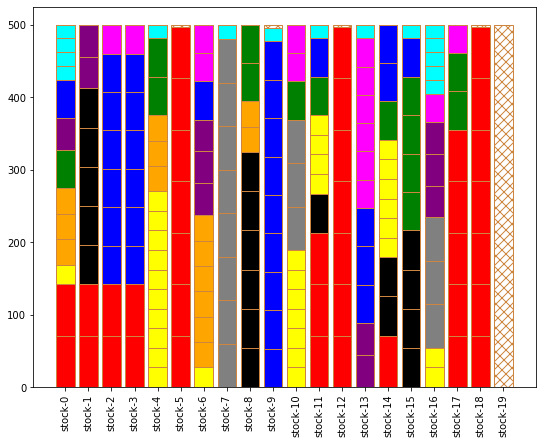

In [329]:
#for visuliation. Try second objective and observe difference between two objectives.
plt.figure(figsize=(9,7))
plt.bar(labels,d, color ="white", edgecolor = "peru",hatch = "\\X//")
for k in range(m):
    a = 0
    b = 0
    for i in range(len(assignment[k][1])):
        if i == 0:
            plt.bar(labels[k],dn[assignment[k][1][i]], edgecolor = "peru", color = colors[assignment[k][1][i]])
            a = dn[assignment[k][1][i]]
        else:
            plt.bar(labels[k], dn[assignment[k][1][i]],edgecolor = "peru", bottom = a+b,color = colors[assignment[k][1][i]])
            b += dn[assignment[k][1][i]]
plt.xticks(labels, rotation = 90)
plt.show()